# 직접 만든 cosine value를 이용한 주가 예측 기본 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tools import fetch_cosine_values,format_dataset
from evaluate_ts import evaluate_ts

In [2]:
feat_dim = 20
train_size = 250
test_size = 250

In [3]:
learning_rate = 0.1
optimizer = tf.keras.optimizers.Adam
loss='mse'
n_epochs = 1000
kernel_initializer = tf.keras.initializers.TruncatedNormal(
    mean=0.0, stddev=1.0, seed=None)
bias_initializer = 'zeros'

In [4]:
if True:
    learning_rate = 0.1
    n_epochs = 1000

In [5]:
cos_values = fetch_cosine_values(train_size+test_size+feat_dim)
minibatch_cos_x, minibatch_cos_y = format_dataset(cos_values, feat_dim)

In [6]:
#텐서플로 분석 속도를 높이기 위해 float32(4bytes)
train_X = minibatch_cos_x[:train_size, :].astype(np.float32)
train_Y = minibatch_cos_y[:train_size].reshape((-1,1)).astype(np.float32)
test_X = minibatch_cos_x[train_size:,:].astype(np.float32)
test_Y = minibatch_cos_y[train_size:].reshape((-1,1)).astype(np.float32)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=feat_dim,
                                kernel_initializer=kernel_initializer,
                                bias_initializer = bias_initializer,
                                activation='linear'))
model.compile(loss=loss,optimizer=optimizer(learning_rate),
             metrics =['MSE','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## regression에서 accuracy가 계속 0인 이유
### Keras Regression Metrics

•Mean Squared Error: mean_squared_error, MSE or mse

•Mean Absolute Error: mean_absolute_error, MAE, mae

•Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape

•Cosine Proximity: cosine_proximity, cosine

### Keras Classification Metrics

•Binary Accuracy: binary_accuracy, acc

•Categorical Accuracy: categorical_accuracy, acc

•Sparse Categorical Accuracy: sparse_categorical_accuracy

•Top k Categorical Accuracy: top_k_categorical_accuracy (requires you specify a k parameter)

•Sparse Top k Categorical Accuracy: sparse_top_k_categorical_accuracy (requires you specify a k parameter) 

by https://newbedev.com/why-is-the-accuracy-for-my-keras-model-always-0-when-training

In [8]:
model.fit(train_X,train_Y,epochs=n_epochs)


Epoch 1/1000
8/8 [==============================] - 0s 425us/step - loss: 0.1826 - MSE: 0.1826 - mae: 0.3438
Epoch 2/1000
8/8 [==============================] - 0s 374us/step - loss: 0.0491 - MSE: 0.0491 - mae: 0.1844
Epoch 3/1000
8/8 [==============================] - 0s 483us/step - loss: 0.0265 - MSE: 0.0265 - mae: 0.1315
Epoch 4/1000
8/8 [==============================] - 0s 452us/step - loss: 0.0065 - MSE: 0.0065 - mae: 0.0669
Epoch 5/1000
8/8 [==============================] - 0s 446us/step - loss: 0.0035 - MSE: 0.0035 - mae: 0.0496
Epoch 6/1000
8/8 [==============================] - 0s 462us/step - loss: 9.6427e-04 - MSE: 9.6427e-04 - mae: 0.0257
Epoch 7/1000
8/8 [==============================] - 0s 417us/step - loss: 4.7371e-04 - MSE: 4.7371e-04 - mae: 0.0181
Epoch 8/1000
8/8 [==============================] - 0s 394us/step - loss: 1.9932e-04 - MSE: 1.9932e-04 - mae: 0.0120
Epoch 9/1000
8/8 [==============================] - 0s 365us/step - loss: 1.1560e-04 - MSE: 1.1560e-04 -

2021-10-07 17:19:02.402381: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-07 17:19:02.402514: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 23/1000
8/8 [==============================] - 0s 420us/step - loss: 4.4485e-09 - MSE: 4.4485e-09 - mae: 5.7073e-05
Epoch 24/1000
8/8 [==============================] - 0s 359us/step - loss: 2.3314e-09 - MSE: 2.3314e-09 - mae: 4.0052e-05
Epoch 25/1000
8/8 [==============================] - 0s 353us/step - loss: 1.9671e-09 - MSE: 1.9671e-09 - mae: 3.6264e-05
Epoch 26/1000
8/8 [==============================] - 0s 360us/step - loss: 1.3705e-09 - MSE: 1.3705e-09 - mae: 3.0211e-05
Epoch 27/1000
8/8 [==============================] - 0s 347us/step - loss: 2.2547e-09 - MSE: 2.2547e-09 - mae: 4.0532e-05
Epoch 28/1000
8/8 [==============================] - 0s 335us/step - loss: 2.8929e-09 - MSE: 2.8929e-09 - mae: 4.4468e-05
Epoch 29/1000
8/8 [==============================] - 0s 348us/step - loss: 2.8808e-09 - MSE: 2.8808e-09 - mae: 4.4661e-05
Epoch 30/1000
8/8 [==============================] - 0s 390us/step - loss: 4.0058e-09 - MSE: 4.0058e-09 - mae: 5.4652e-05
Epoch 31/1000
8/8 [=====

8/8 [==============================] - 0s 375us/step - loss: 2.9302e-06 - MSE: 2.9302e-06 - mae: 0.0015
Epoch 93/1000
8/8 [==============================] - 0s 328us/step - loss: 9.2912e-07 - MSE: 9.2912e-07 - mae: 7.6642e-04
Epoch 94/1000
8/8 [==============================] - 0s 393us/step - loss: 4.8091e-07 - MSE: 4.8091e-07 - mae: 5.3467e-04
Epoch 95/1000
8/8 [==============================] - 0s 338us/step - loss: 6.5042e-07 - MSE: 6.5042e-07 - mae: 7.0108e-04
Epoch 96/1000
8/8 [==============================] - 0s 363us/step - loss: 3.2799e-07 - MSE: 3.2799e-07 - mae: 4.4670e-04
Epoch 97/1000
8/8 [==============================] - 0s 377us/step - loss: 1.8210e-07 - MSE: 1.8210e-07 - mae: 3.5369e-04
Epoch 98/1000
8/8 [==============================] - 0s 360us/step - loss: 5.9386e-08 - MSE: 5.9386e-08 - mae: 1.8720e-04
Epoch 99/1000
8/8 [==============================] - 0s 370us/step - loss: 3.0217e-08 - MSE: 3.0217e-08 - mae: 1.4413e-04
Epoch 100/1000
8/8 [======================

8/8 [==============================] - 0s 372us/step - loss: 1.5818e-11 - MSE: 1.5818e-11 - mae: 3.2706e-06
Epoch 159/1000
8/8 [==============================] - 0s 341us/step - loss: 1.4477e-11 - MSE: 1.4477e-11 - mae: 2.9265e-06
Epoch 160/1000
8/8 [==============================] - 0s 357us/step - loss: 2.7878e-11 - MSE: 2.7878e-11 - mae: 4.4271e-06
Epoch 161/1000
8/8 [==============================] - 0s 347us/step - loss: 2.5885e-11 - MSE: 2.5885e-11 - mae: 4.1891e-06
Epoch 162/1000
8/8 [==============================] - 0s 352us/step - loss: 2.8012e-11 - MSE: 2.8012e-11 - mae: 4.3455e-06
Epoch 163/1000
8/8 [==============================] - 0s 407us/step - loss: 2.8820e-11 - MSE: 2.8820e-11 - mae: 4.2451e-06
Epoch 164/1000
8/8 [==============================] - 0s 336us/step - loss: 8.2308e-11 - MSE: 8.2308e-11 - mae: 7.2666e-06
Epoch 165/1000
8/8 [==============================] - 0s 363us/step - loss: 2.1678e-11 - MSE: 2.1678e-11 - mae: 3.8226e-06
Epoch 166/1000
8/8 [===========

8/8 [==============================] - 0s 366us/step - loss: 3.5826e-08 - MSE: 3.5826e-08 - mae: 1.5687e-04
Epoch 227/1000
8/8 [==============================] - 0s 352us/step - loss: 1.1219e-08 - MSE: 1.1219e-08 - mae: 8.0493e-05
Epoch 228/1000
8/8 [==============================] - 0s 333us/step - loss: 1.0008e-08 - MSE: 1.0008e-08 - mae: 8.5672e-05
Epoch 229/1000
8/8 [==============================] - 0s 339us/step - loss: 7.2620e-09 - MSE: 7.2620e-09 - mae: 7.1704e-05
Epoch 230/1000
8/8 [==============================] - 0s 333us/step - loss: 6.1735e-09 - MSE: 6.1735e-09 - mae: 7.2107e-05
Epoch 231/1000
8/8 [==============================] - 0s 341us/step - loss: 7.0431e-09 - MSE: 7.0431e-09 - mae: 6.6848e-05
Epoch 232/1000
8/8 [==============================] - 0s 361us/step - loss: 4.2182e-09 - MSE: 4.2182e-09 - mae: 5.3711e-05
Epoch 233/1000
8/8 [==============================] - 0s 341us/step - loss: 3.0645e-09 - MSE: 3.0645e-09 - mae: 4.6258e-05
Epoch 234/1000
8/8 [===========

8/8 [==============================] - 0s 381us/step - loss: 2.4306e-08 - MSE: 2.4306e-08 - mae: 1.2885e-04
Epoch 293/1000
8/8 [==============================] - 0s 356us/step - loss: 1.7811e-08 - MSE: 1.7811e-08 - mae: 1.0266e-04
Epoch 294/1000
8/8 [==============================] - 0s 338us/step - loss: 2.6463e-08 - MSE: 2.6463e-08 - mae: 1.3692e-04
Epoch 295/1000
8/8 [==============================] - 0s 323us/step - loss: 1.1959e-07 - MSE: 1.1959e-07 - mae: 2.9533e-04
Epoch 296/1000
8/8 [==============================] - 0s 368us/step - loss: 3.5338e-07 - MSE: 3.5338e-07 - mae: 5.0411e-04
Epoch 297/1000
8/8 [==============================] - 0s 338us/step - loss: 5.6818e-07 - MSE: 5.6818e-07 - mae: 6.2603e-04
Epoch 298/1000
8/8 [==============================] - 0s 385us/step - loss: 4.0828e-07 - MSE: 4.0828e-07 - mae: 5.1992e-04
Epoch 299/1000
8/8 [==============================] - 0s 349us/step - loss: 1.7327e-07 - MSE: 1.7327e-07 - mae: 3.3768e-04
Epoch 300/1000
8/8 [===========

8/8 [==============================] - 0s 353us/step - loss: 1.6706e-06 - MSE: 1.6706e-06 - mae: 0.0011
Epoch 362/1000
8/8 [==============================] - 0s 333us/step - loss: 8.1739e-07 - MSE: 8.1739e-07 - mae: 7.0549e-04
Epoch 363/1000
8/8 [==============================] - 0s 333us/step - loss: 8.1055e-08 - MSE: 8.1055e-08 - mae: 2.5129e-04
Epoch 364/1000
8/8 [==============================] - 0s 377us/step - loss: 2.2671e-07 - MSE: 2.2671e-07 - mae: 3.7440e-04
Epoch 365/1000
8/8 [==============================] - 0s 333us/step - loss: 2.1096e-07 - MSE: 2.1096e-07 - mae: 3.9669e-04
Epoch 366/1000
8/8 [==============================] - 0s 321us/step - loss: 3.0728e-08 - MSE: 3.0728e-08 - mae: 1.4848e-04
Epoch 367/1000
8/8 [==============================] - 0s 354us/step - loss: 8.3571e-09 - MSE: 8.3571e-09 - mae: 7.0898e-05
Epoch 368/1000
8/8 [==============================] - 0s 322us/step - loss: 8.9619e-09 - MSE: 8.9619e-09 - mae: 7.1180e-05
Epoch 369/1000
8/8 [===============

8/8 [==============================] - 0s 364us/step - loss: 1.1779e-06 - MSE: 1.1779e-06 - mae: 8.3905e-04
Epoch 430/1000
8/8 [==============================] - 0s 358us/step - loss: 1.4930e-06 - MSE: 1.4930e-06 - mae: 0.0010
Epoch 431/1000
8/8 [==============================] - 0s 340us/step - loss: 6.6827e-07 - MSE: 6.6827e-07 - mae: 6.4873e-04
Epoch 432/1000
8/8 [==============================] - 0s 393us/step - loss: 1.5010e-07 - MSE: 1.5010e-07 - mae: 3.2557e-04
Epoch 433/1000
8/8 [==============================] - 0s 338us/step - loss: 1.4529e-07 - MSE: 1.4529e-07 - mae: 2.9760e-04
Epoch 434/1000
8/8 [==============================] - 0s 370us/step - loss: 8.5009e-08 - MSE: 8.5009e-08 - mae: 2.3521e-04
Epoch 435/1000
8/8 [==============================] - 0s 337us/step - loss: 2.0496e-08 - MSE: 2.0496e-08 - mae: 1.0404e-04
Epoch 436/1000
8/8 [==============================] - 0s 325us/step - loss: 1.3030e-08 - MSE: 1.3030e-08 - mae: 9.0644e-05
Epoch 437/1000
8/8 [===============

8/8 [==============================] - 0s 397us/step - loss: 2.4388e-12 - MSE: 2.4388e-12 - mae: 1.3066e-06
Epoch 496/1000
8/8 [==============================] - 0s 343us/step - loss: 7.1331e-12 - MSE: 7.1331e-12 - mae: 2.1748e-06
Epoch 497/1000
8/8 [==============================] - 0s 361us/step - loss: 3.7432e-12 - MSE: 3.7432e-12 - mae: 1.6030e-06
Epoch 498/1000
8/8 [==============================] - 0s 349us/step - loss: 5.6845e-12 - MSE: 5.6845e-12 - mae: 1.9668e-06
Epoch 499/1000
8/8 [==============================] - 0s 346us/step - loss: 6.4443e-12 - MSE: 6.4443e-12 - mae: 2.1242e-06
Epoch 500/1000
8/8 [==============================] - 0s 328us/step - loss: 1.4596e-12 - MSE: 1.4596e-12 - mae: 9.3323e-07
Epoch 501/1000
8/8 [==============================] - 0s 336us/step - loss: 1.2446e-12 - MSE: 1.2446e-12 - mae: 9.3349e-07
Epoch 502/1000
8/8 [==============================] - 0s 351us/step - loss: 2.7030e-12 - MSE: 2.7030e-12 - mae: 1.3250e-06
Epoch 503/1000
8/8 [===========

8/8 [==============================] - 0s 332us/step - loss: 2.5138e-04 - MSE: 2.5138e-04 - mae: 0.0138
Epoch 562/1000
8/8 [==============================] - 0s 387us/step - loss: 0.0014 - MSE: 0.0014 - mae: 0.0292  
Epoch 563/1000
8/8 [==============================] - 0s 345us/step - loss: 0.0069 - MSE: 0.0069 - mae: 0.0662
Epoch 564/1000
8/8 [==============================] - 0s 344us/step - loss: 0.0134 - MSE: 0.0134 - mae: 0.0815  
Epoch 565/1000
8/8 [==============================] - 0s 348us/step - loss: 0.0635 - MSE: 0.0635 - mae: 0.2007
Epoch 566/1000
8/8 [==============================] - 0s 342us/step - loss: 0.0069 - MSE: 0.0069 - mae: 0.0675
Epoch 567/1000
8/8 [==============================] - 0s 313us/step - loss: 0.0036 - MSE: 0.0036 - mae: 0.0498
Epoch 568/1000
8/8 [==============================] - 0s 332us/step - loss: 0.0024 - MSE: 0.0024 - mae: 0.0402
Epoch 569/1000
8/8 [==============================] - 0s 325us/step - loss: 5.9856e-04 - MSE: 5.9856e-04 - mae: 0.0

8/8 [==============================] - 0s 335us/step - loss: 1.2314e-08 - MSE: 1.2314e-08 - mae: 9.1943e-05
Epoch 632/1000
8/8 [==============================] - 0s 337us/step - loss: 5.7578e-09 - MSE: 5.7578e-09 - mae: 6.4518e-05
Epoch 633/1000
8/8 [==============================] - 0s 380us/step - loss: 2.2536e-08 - MSE: 2.2536e-08 - mae: 1.2540e-04
Epoch 634/1000
8/8 [==============================] - 0s 343us/step - loss: 1.7287e-08 - MSE: 1.7287e-08 - mae: 1.0924e-04
Epoch 635/1000
8/8 [==============================] - 0s 363us/step - loss: 1.5045e-08 - MSE: 1.5045e-08 - mae: 1.0071e-04
Epoch 636/1000
8/8 [==============================] - 0s 332us/step - loss: 1.1047e-08 - MSE: 1.1047e-08 - mae: 8.5401e-05
Epoch 637/1000
8/8 [==============================] - 0s 356us/step - loss: 3.6257e-09 - MSE: 3.6257e-09 - mae: 5.1183e-05
Epoch 638/1000
8/8 [==============================] - 0s 369us/step - loss: 3.0669e-09 - MSE: 3.0669e-09 - mae: 4.4383e-05
Epoch 639/1000
8/8 [===========

8/8 [==============================] - 0s 325us/step - loss: 0.0112 - MSE: 0.0112 - mae: 0.0849
Epoch 700/1000
8/8 [==============================] - 0s 349us/step - loss: 0.0030 - MSE: 0.0030 - mae: 0.0454
Epoch 701/1000
8/8 [==============================] - 0s 351us/step - loss: 0.0011 - MSE: 0.0011 - mae: 0.0292
Epoch 702/1000
8/8 [==============================] - 0s 391us/step - loss: 7.1458e-04 - MSE: 7.1458e-04 - mae: 0.0224
Epoch 703/1000
8/8 [==============================] - 0s 327us/step - loss: 2.6686e-04 - MSE: 2.6686e-04 - mae: 0.0135
Epoch 704/1000
8/8 [==============================] - 0s 339us/step - loss: 1.5854e-04 - MSE: 1.5854e-04 - mae: 0.0112
Epoch 705/1000
8/8 [==============================] - 0s 316us/step - loss: 7.9177e-05 - MSE: 7.9177e-05 - mae: 0.0077
Epoch 706/1000
8/8 [==============================] - 0s 324us/step - loss: 7.8877e-05 - MSE: 7.8877e-05 - mae: 0.0074
Epoch 707/1000
8/8 [==============================] - 0s 388us/step - loss: 6.2820e-05 

8/8 [==============================] - 0s 330us/step - loss: 7.1196e-14 - MSE: 7.1196e-14 - mae: 2.0868e-07
Epoch 767/1000
8/8 [==============================] - 0s 355us/step - loss: 1.0184e-13 - MSE: 1.0184e-13 - mae: 2.5053e-07
Epoch 768/1000
8/8 [==============================] - 0s 351us/step - loss: 5.5396e-14 - MSE: 5.5396e-14 - mae: 1.8936e-07
Epoch 769/1000
8/8 [==============================] - 0s 317us/step - loss: 2.3092e-13 - MSE: 2.3092e-13 - mae: 3.6125e-07
Epoch 770/1000
8/8 [==============================] - 0s 371us/step - loss: 5.9386e-13 - MSE: 5.9386e-13 - mae: 6.3905e-07
Epoch 771/1000
8/8 [==============================] - 0s 375us/step - loss: 3.7463e-13 - MSE: 3.7463e-13 - mae: 4.7800e-07
Epoch 772/1000
8/8 [==============================] - 0s 398us/step - loss: 4.6937e-13 - MSE: 4.6937e-13 - mae: 4.9944e-07
Epoch 773/1000
8/8 [==============================] - 0s 354us/step - loss: 7.2972e-13 - MSE: 7.2972e-13 - mae: 6.9919e-07
Epoch 774/1000
8/8 [===========

8/8 [==============================] - 0s 330us/step - loss: 4.6024e-13 - MSE: 4.6024e-13 - mae: 5.5804e-07
Epoch 833/1000
8/8 [==============================] - 0s 352us/step - loss: 5.2027e-13 - MSE: 5.2027e-13 - mae: 6.0514e-07
Epoch 834/1000
8/8 [==============================] - 0s 356us/step - loss: 9.0067e-13 - MSE: 9.0067e-13 - mae: 8.0996e-07
Epoch 835/1000
8/8 [==============================] - 0s 388us/step - loss: 1.8292e-13 - MSE: 1.8292e-13 - mae: 3.3983e-07
Epoch 836/1000
8/8 [==============================] - 0s 338us/step - loss: 3.1388e-13 - MSE: 3.1388e-13 - mae: 4.3656e-07
Epoch 837/1000
8/8 [==============================] - 0s 389us/step - loss: 8.8355e-14 - MSE: 8.8355e-14 - mae: 2.2625e-07
Epoch 838/1000
8/8 [==============================] - 0s 327us/step - loss: 3.4596e-13 - MSE: 3.4596e-13 - mae: 4.5864e-07
Epoch 839/1000
8/8 [==============================] - 0s 337us/step - loss: 1.0434e-13 - MSE: 1.0434e-13 - mae: 2.5549e-07
Epoch 840/1000
8/8 [===========

Epoch 900/1000
8/8 [==============================] - 0s 339us/step - loss: 0.0521 - MSE: 0.0521 - mae: 0.1872
Epoch 901/1000
8/8 [==============================] - 0s 336us/step - loss: 0.0205 - MSE: 0.0205 - mae: 0.1170
Epoch 902/1000
8/8 [==============================] - 0s 334us/step - loss: 0.0150 - MSE: 0.0150 - mae: 0.0951
Epoch 903/1000
8/8 [==============================] - 0s 341us/step - loss: 0.0046 - MSE: 0.0046 - mae: 0.0594
Epoch 904/1000
8/8 [==============================] - 0s 336us/step - loss: 4.8328e-04 - MSE: 4.8328e-04 - mae: 0.0185
Epoch 905/1000
8/8 [==============================] - 0s 376us/step - loss: 1.7015e-04 - MSE: 1.7015e-04 - mae: 0.0108
Epoch 906/1000
8/8 [==============================] - 0s 377us/step - loss: 1.1974e-04 - MSE: 1.1974e-04 - mae: 0.0090
Epoch 907/1000
8/8 [==============================] - 0s 351us/step - loss: 1.3484e-04 - MSE: 1.3484e-04 - mae: 0.0092
Epoch 908/1000
8/8 [==============================] - 0s 331us/step - loss: 3.79

8/8 [==============================] - 0s 349us/step - loss: 2.8633e-13 - MSE: 2.8633e-13 - mae: 4.1716e-07
Epoch 968/1000
8/8 [==============================] - 0s 339us/step - loss: 3.9238e-13 - MSE: 3.9238e-13 - mae: 4.9527e-07
Epoch 969/1000
8/8 [==============================] - 0s 347us/step - loss: 4.9786e-13 - MSE: 4.9786e-13 - mae: 5.2239e-07
Epoch 970/1000
8/8 [==============================] - 0s 348us/step - loss: 1.1202e-13 - MSE: 1.1202e-13 - mae: 2.7164e-07
Epoch 971/1000
8/8 [==============================] - 0s 339us/step - loss: 7.0349e-14 - MSE: 7.0349e-14 - mae: 2.1112e-07
Epoch 972/1000
8/8 [==============================] - 0s 336us/step - loss: 9.0234e-14 - MSE: 9.0234e-14 - mae: 2.3840e-07
Epoch 973/1000
8/8 [==============================] - 0s 330us/step - loss: 3.9609e-13 - MSE: 3.9609e-13 - mae: 5.1863e-07
Epoch 974/1000
8/8 [==============================] - 0s 327us/step - loss: 2.0521e-13 - MSE: 2.0521e-13 - mae: 3.6606e-07
Epoch 975/1000
8/8 [===========

In [9]:
y_pr = model.predict(test_X)

In [10]:
results = model.evaluate(test_X,test_Y)

8/8 [==============================] - 0s 399us/step - loss: 1.9858e-13 - MSE: 1.9858e-13 - mae: 3.8692e-07


#### 훈련 성능과 테스트 성능이 비슷함 = 과적합되지 않음
#### 모델링하지 않았을 때보다 했을 때의 오차값이 더 낮음

Evaluation of the predictions:
MSE: 1.9858415e-13
mae: 3.8692355e-07
Benchmark: if prediction == last feature
MSE: 0.9719938
mae: 0.7949493


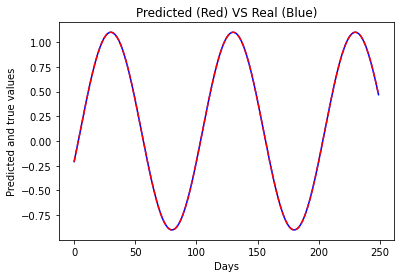

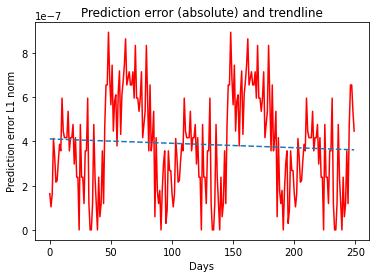

In [11]:
evaluate_ts(test_X, test_Y, y_pr)

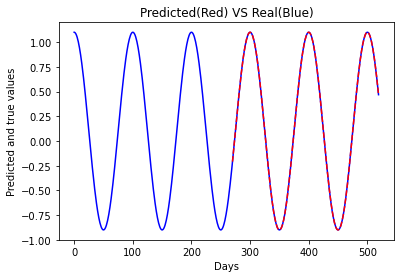

In [12]:
plt.plot(range(len(cos_values)),cos_values,'b')
plt.plot(range(len(cos_values)-test_size,len(cos_values)),y_pr,'r--')
plt.xlabel("Days")
plt.ylabel("Predicted and true values")
plt.title("Predicted(Red) VS Real(Blue)")
plt.show()